# 2回目以降.ver


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


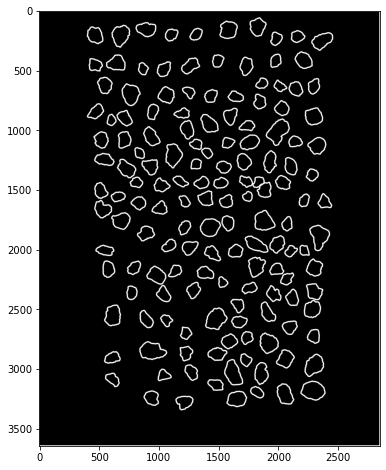

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 17 17:38:06 2020

@author: sayaka71
"""

# nameを変更する
name = "IMG_6081"

# scriptの更新を反映するおまじない
%load_ext autoreload
%autoreload 2

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


# グラフ描画の関数定義
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

# グレー画像
img = cv2.imread("2020-11/{}.jpg".format(name))
img = img[630:4272, 0:2848]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# img = cv2.bitwise_not(img)


# 大津法で2値化 retはbool値
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# ノイズを消す
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 5)

# 確実な背景
sure_bg = cv2.dilate(opening,kernel,iterations=5)

# --- 距離変換　（オブジェクトと背景の距離を出す） ---
# 閾値（距離変換で得られた値の最大値×0.2） ←ここを調節！
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.2*dist_transform.max(), 255, 0)

# 距離変換の結果から確実な前景を
sure_fg = np.uint8(sure_fg)

# 前景でも後景でもないUnknown
unknown = cv2.subtract(sure_bg,sure_fg)


# オブジェクトごとにラベルをつける
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

# markersデータをもとにwatershed
markers = cv2.watershed(img, markers)

# contours(輪郭), hierarchy(階層，親子)
contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

# canvas
canvas = np.zeros(np.shape(img))

# write line
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        # 境界を赤色で描く  (255, 255,　255)： color red,  5pt line
        cv2.drawContours(canvas, contours, i, (255,255,255), 7)
        
display(canvas)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '6.Output')

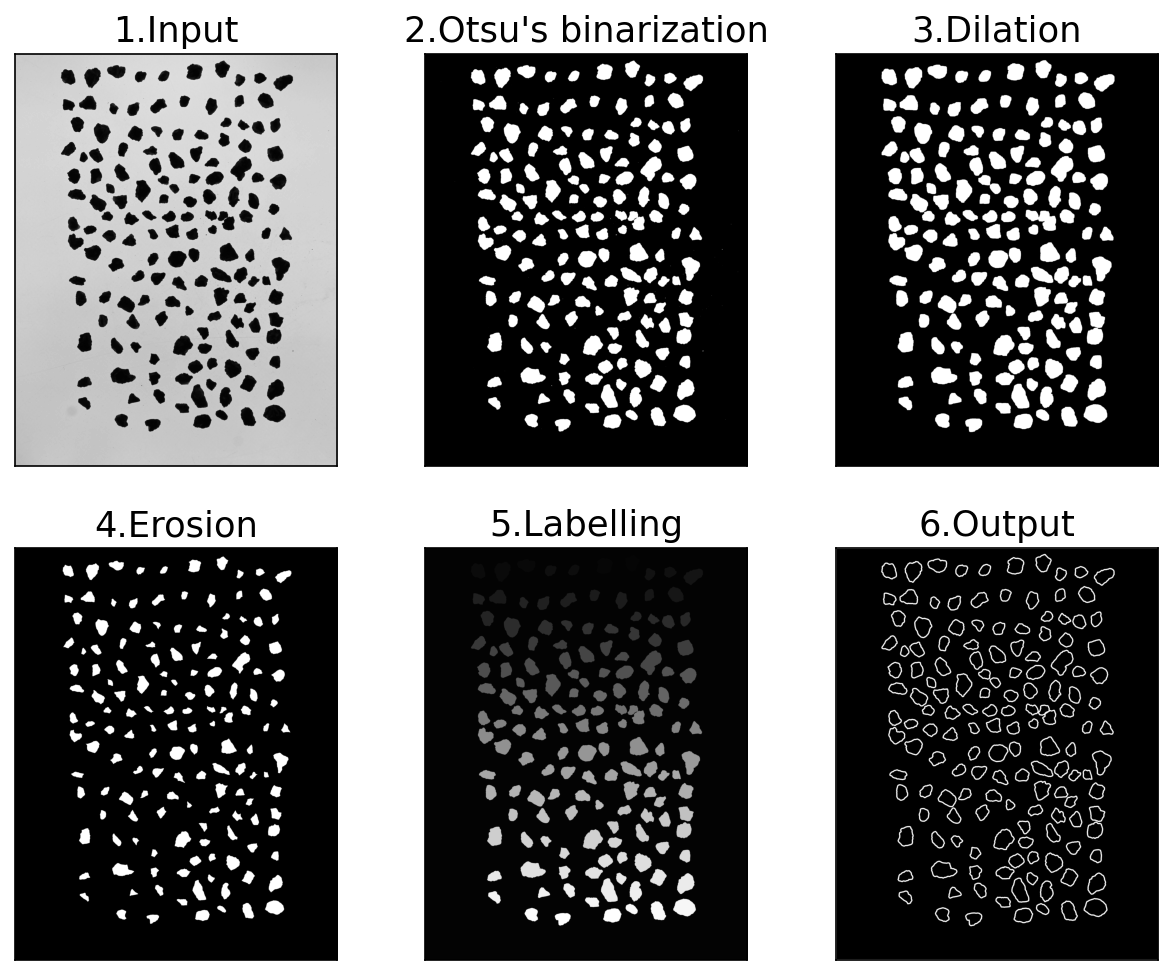

In [5]:
fig, ax = plt.subplots(2,3, figsize=(10,8), dpi=150)



ax[0,0].tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
ax[0,0].tick_params(bottom=False,
               left=False,
               right=False,
               top=False)

ax[0,1].tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
ax[0,1].tick_params(bottom=False,
               left=False,
               right=False,
               top=False)

ax[0,2].tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
ax[0,2].tick_params(bottom=False,
               left=False,
               right=False,
               top=False)

ax[1,0].tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
ax[1,0].tick_params(bottom=False,
               left=False,
               right=False,
               top=False)

ax[1,1].tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
ax[1,1].tick_params(bottom=False,
               left=False,
               right=False,
               top=False)

ax[1,2].tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
ax[1,2].tick_params(bottom=False,
               left=False,
               right=False,
               top=False)

ax[0,0].imshow(gray, cmap="gray")

ax[0,1].imshow(thresh, cmap="gray")

ax[0,2].imshow(sure_bg, cmap="gray")

ax[1,0].imshow(sure_fg, cmap="gray")

ax[1,1].imshow(markers, cmap = "gray")

ax[1,2].imshow(canvas, cmap = "gray")

f = 17
ax[0,0].set_title("1.Input", fontsize = f)
ax[0,1].set_title("2.Otsu's binarization", fontsize = f)
ax[0,2].set_title("3.Dilation", fontsize = f)
ax[1,0].set_title("4.Erosion", fontsize = f)
ax[1,1].set_title("5.Labelling", fontsize = f)
ax[1,2].set_title("6.Output", fontsize = f)

# plt.imshow(thresh, cmap="gray")
# plt.imshow(sure_bg, cmap="gray")
# plt.imshow(unknown, cmap="gray")
# plt.imshow(markers)

In [6]:
fig.savefig("method_image")

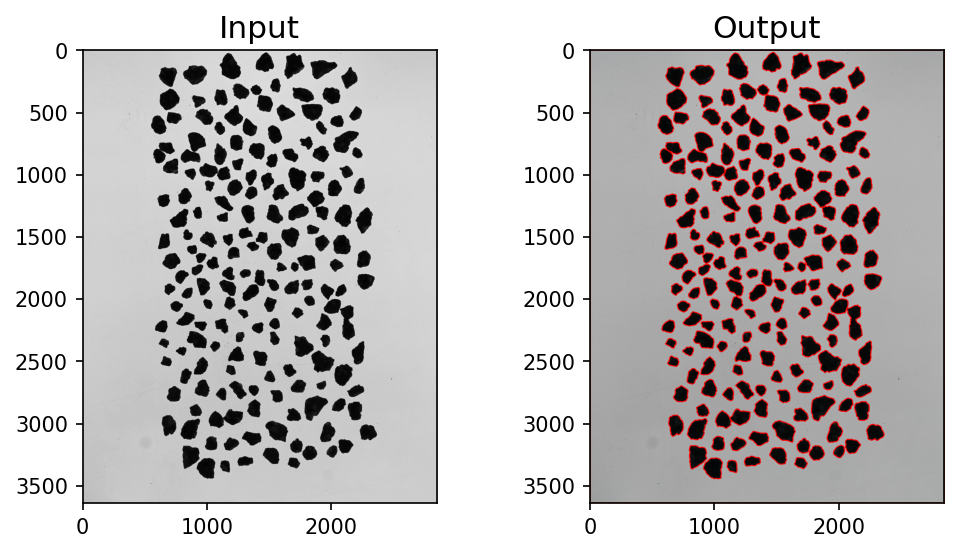

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4), dpi=150)

ax1.imshow(gray, cmap="gray")
ax1.set_title("Input", fontsize=15)
ax2.imshow(img)
ax2.set_title("Output", fontsize=15)

fig.savefig("input_outp")

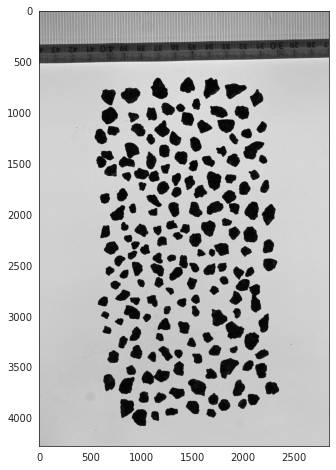

In [104]:
img = cv2.imread('2020-11/{}.JPG'.format(name))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.imshow(gray,cmap='gray')
# fig.savefig("gray.png")

In [105]:
len(contours)

353

In [106]:
# 外れ値をdelete（あとで外れ値がわかるけど先に削除しとく）
# contours = np.delete(contours, 1678,0)
# contours = np.delete(contours, -1,0)
# ERROR: 89
contours = np.delete(contours, -2,0)
contours = np.delete(contours, -1,0)

OpenCV公式サイト⇨ [Moment](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html)

In [107]:
from math import sqrt, pi ,acos
from tqdm import tqdm
from scipy.spatial import distance

# 粒子の形状を測定
Areas = []
Perimeters = []
Circularities = []
Eq_diameters = []
Longest = []
Shortest = []
Aspect_Ratio = []
Distance_Gomez = []
degrees = np.arange(0, 2*pi, 2*pi/36) # degrees: 10度ずつで回す (2pi/36 = 10deg)

for cnt in tqdm(contours):
    # 面積 (px*px)
    area = cv2.contourArea(cnt)
    Areas.append(area)
    
    # 周囲長(perimeter)
    arc = cv2.arcLength(cnt, True)
    Perimeters.append(arc)
    # 円形度(circularity)
    circularity = 4 * np.pi * area/(arc*arc)
    Circularities.append(circularity)
    
    # 等価直径(px)
    eq_diameter = np.sqrt(4 * area/np.pi)
    Eq_diameters.append(eq_diameter)
    
    # 重心(Moment)
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    # 重心から輪郭までの距離 (Distance_Gomez)
    for deg in degrees:
        for cnts in cnt:
            # cntの(x,y)座標
            x = cnts[0,0]
            y = cnts[0,1]
            # ユークリッド距離
            d_eu = distance.euclidean((x,y), (cx,cy))
            # 指定角度の方向にある輪郭の点を求める誤差1度まで ( |acos(x-cx) / d_eu| < 1 degree )
            if abs(acos((x-cx)/d_eu) - deg) < pi/360:
                break
            else:
                continue
        # scaling　等価直径で除することでスケーリングをする．揃える
        d_eu_scaled = d_eu/eq_diameter
        Distance_Gomez.append(d_eu_scaled)
    # Ellipse - 短軸, 長軸 ax
    ellipse = cv2.fitEllipse(cnt)
    Shortest.append(ellipse[1][0])
    Longest.append(ellipse[1][1])
    
    # Aspect Ratio（長軸÷短軸）
    Aspect_Ratio.append(ellipse[1][0]/ellipse[1][1])
    
    
            
        

100%|██████████| 351/351 [00:49<00:00,  7.06it/s]


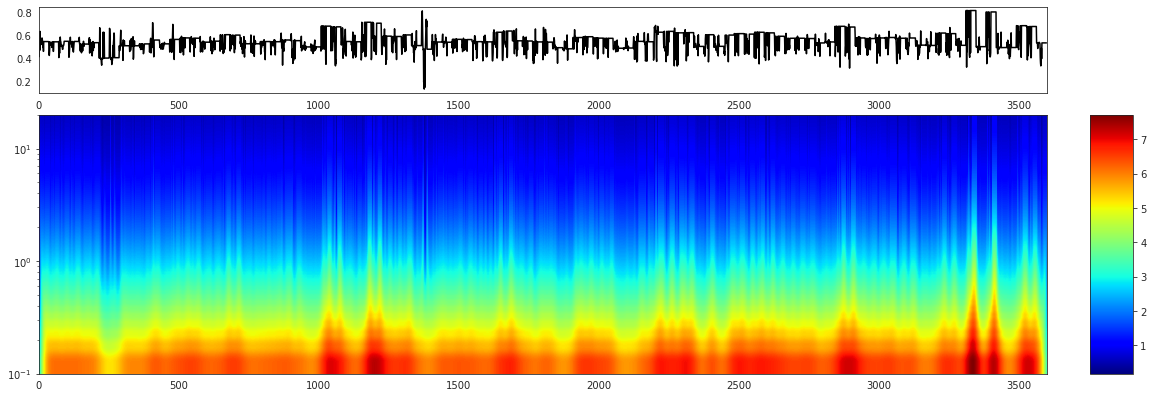

In [11]:
# morlet wavelet n=100 (n=3600/36), omega=0.02

sns.set_style('white')
from swan import pycwt
x = np.arange(len(Distance_Gomez[:3600]))
y = Distance_Gomez[:3600]
              
Fs = 1/0.01
omega0 = 0.02

# (1)　Freqを指定してcwt
freqs=np.arange(0.1,10,0.025)
r=pycwt.cwt_f(y,freqs,Fs,pycwt.Morlet(omega0))
rr=np.abs(r)


plt.rcParams['figure.figsize'] = (20, 6)
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2])
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

ax1.plot(x, y, 'k')

img = ax2.imshow(np.flipud(rr), extent=[0, 3600,0.1, 20], aspect='auto', cmap='jet') 
twin_ax = ax2
twin_ax.set_yscale('log')
twin_ax.set_xlim(0, 3600)
twin_ax.set_ylim(0.1, 20)
ax2.tick_params(which='both', labelleft=False, left=False)
twin_ax.tick_params(which='both', labelleft=True, left=True, labelright=False)
fig.colorbar(img, cax=ax3)
plt.show()

## DataFrame

In [108]:
# サンプルデータの名前を入れる
names = []
len(Areas)
for i in range(len(Areas)):
    names.append(name)

In [109]:
import pandas as pd
df = pd.DataFrame({'Area': Areas, 'Circularity': Circularities, 'Equal_Diameter': Eq_diameters, 'Shortest_Axis': Shortest, 'Longest_Axis': Longest, 'Perimeters': Perimeters, 'Aspect_Ratio': Aspect_Ratio, 'name': names})

In [110]:
df.head()

,Area,Circularity,Equal_Diameter,Shortest_Axis,Longest_Axis,Perimeters,Aspect_Ratio,name
0,5889.0,0.768535,86.591614,77.754143,102.617081,310.308655,0.757712,IMG_6047
1,6453.0,0.783933,90.643338,81.313065,106.432014,321.622364,0.763991,IMG_6047
2,18546.5,0.760385,153.668921,145.505936,169.565262,553.629504,0.858112,IMG_6047
3,19508.5,0.768111,157.603914,149.049957,172.922256,564.943213,0.861948,IMG_6047
4,6025.5,0.764874,87.589411,80.107368,98.708885,314.634556,0.811552,IMG_6047


In [111]:
# 外れ値
# df.loc[df['Longest Length(px)'] > 700]
# >>> 1678, 1341
# df.loc[df['Longest Axis(px)'] > 300]

In [112]:
# df.loc[df['Circularity'] < 0.6]

In [113]:
# df.drop(1678,axis=0, inplace=True)
# df.drop(1341,axis=0, inplace=True)
# df.drop([32,33,66,67,76,78,130,131,132,133], inplace=True)

In [114]:
df.describe()

,Area,Circularity,Equal_Diameter,Shortest_Axis,Longest_Axis,Perimeters,Aspect_Ratio
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,10634.896011,0.734935,113.355413,100.769587,134.856075,418.859318,0.765190
std,5012.475374,0.061142,26.330507,22.991875,38.819826,112.527497,0.114192
min,3532.500000,0.363587,67.065033,57.712673,74.338425,232.208151,0.341079
25%,6580.500000,0.709143,91.534391,83.166370,105.545906,330.877197,0.693448
50%,9484.500000,0.741545,109.891039,97.595337,131.418579,404.350286,0.778286
75%,13268.750000,0.771281,129.978064,115.247433,155.033669,470.721388,0.853963
max,29392.500000,0.844434,193.452044,162.217255,313.704559,1007.903669,0.987623


sample number = 351



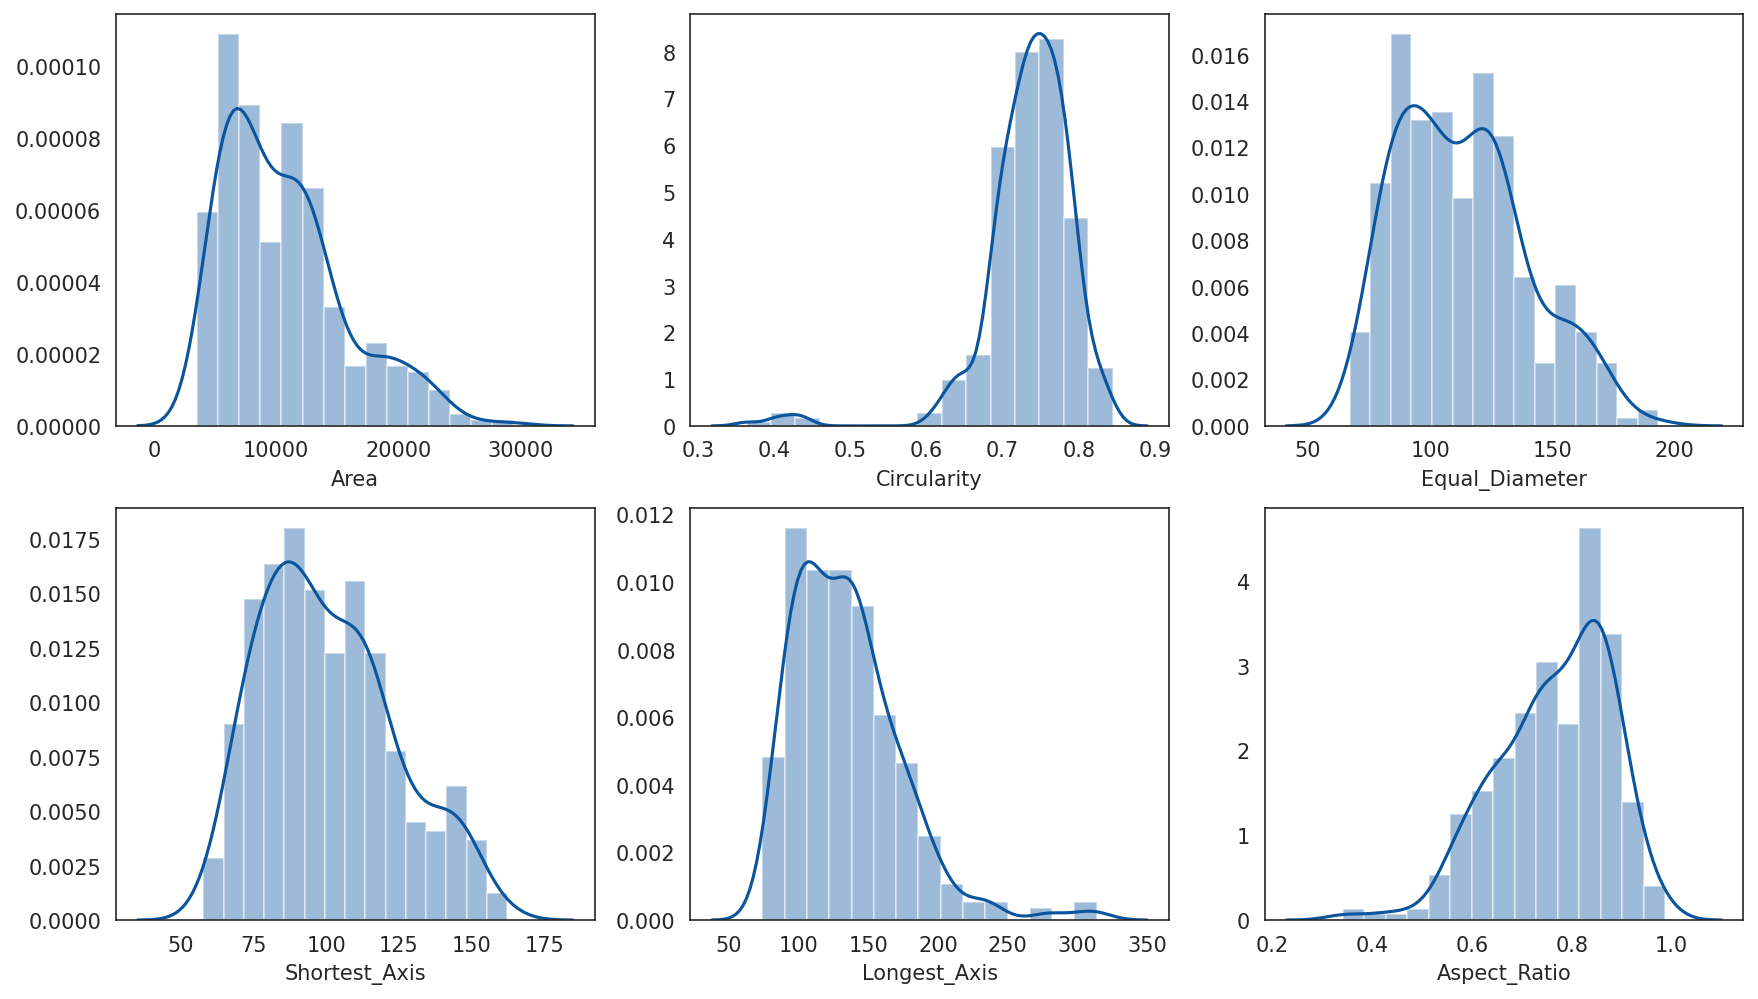

In [115]:
import seaborn as sns
sns.set_style('white')
sns.set_palette('Blues_r')
print('sample number = {}\n'.format(len(contours)))
fig, ax = plt.subplots(2,3,figsize=(14,8), dpi=150)

sns.distplot(df['Area'], ax=ax[0,0], bins=15)
sns.distplot(df['Circularity'], ax=ax[0,1], bins=15)
sns.distplot(df['Equal_Diameter'], ax=ax[0,2], bins=15)
sns.distplot(df['Shortest_Axis'], ax=ax[1,0], bins=15)
sns.distplot(df['Longest_Axis'], ax=ax[1,1], bins=15)
sns.distplot(df['Aspect_Ratio'], ax=ax[1,2], bins=15);
# -- ↑↑↑↑縦軸・横軸の単位入れたほうが、グラフとして良い気がする↑↑↑↑ --
# 後で、density（縦軸入れとくか！）

# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 
# 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 
# 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
# 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 
# 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
# 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
# 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r',
# 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
# 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
# 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix',
# 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
# 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg',
# 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 
# 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r',
# 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
# 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r',
# 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
# 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


In [116]:
# fig.savefig("fig.png")

In [117]:
# save dataset as "csv"
# 'w': 新規作成 <-> 上書き保存， 'a': 追記，
pd.DataFrame.to_csv(df, 'csv/{}.csv'.format(name), index=False, mode = 'w')

# df_distance = pd.DataFrame(Distance_Gomez)
# pd.DataFrame.to_csv(df_distance, 'csv/4453_distance.csv') この処理は何故...?

# 確率分布
![distribution](Distribution.png)

In [4]:
!pip list

Package                            Version
---------------------------------- -----------
ad3                                2.2.1
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.7
anaconda-project                   0.8.3
asn1crypto                         1.0.1
astroid                            2.3.1
astropy                            4.0.1.post1
atomicwrites                       1.3.0
attrs                              19.3.0
Babel                              2.7.0
backcall                           0.1.0
backports.functools-lru-cache      1.5
backports.os                       0.1.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
beautifulsoup4                     4.8.0
bitarray                           1.0.1
bkcharts                           0.2
bleach                             3.1.0
bokeh                              1.3.4
bo

In [3]:
# import sys
# print(sys.version)

3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]


In [7]:
# !pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 6.5 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1
